In [57]:
import pandas as pd

# Load CSV
df = pd.read_csv("dataset.csv")
df = df.sort_values(by='step')

df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
425126,0,'C182918114','5','F','28007','M1535107174','28007','es_wellnessandbeauty',128.26,0
168550,0,'C1413774656','2','F','28007','M692898500','28007','es_health',15.04,0
372208,0,'C2116616608','4','F','28007','M348934600','28007','es_transportation',34.73,0
36658,0,'C976209265','4','M','28007','M348934600','28007','es_transportation',34.66,0
471754,0,'C260840933','2','M','28007','M348934600','28007','es_transportation',25.59,0
...,...,...,...,...,...,...,...,...,...,...
330628,179,'C1978250683','3','F','28007','M1053599405','28007','es_health',35.55,0
535142,179,'C358037591','3','M','28007','M1823072687','28007','es_transportation',37.62,0
56,179,'C1313060996','3','F','28007','M1823072687','28007','es_transportation',29.06,0
49785,179,'C409331076','4','M','28007','M1823072687','28007','es_transportation',17.78,0


In [58]:
### DATA ANALYSIS

fraud
0    98.786946
1     1.213054
Name: proportion, dtype: float64


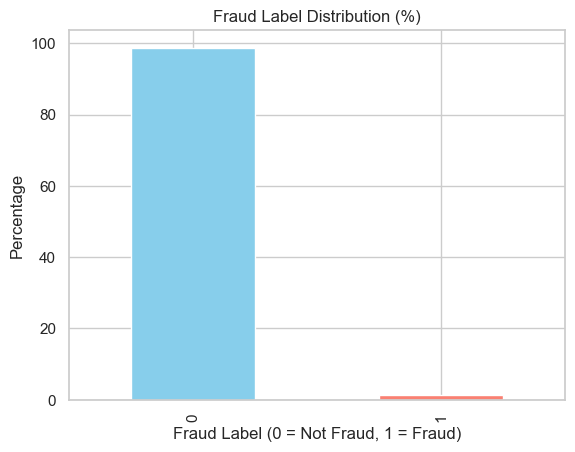

In [59]:
# Count values
fraud_counts = df['fraud'].value_counts(normalize=True) * 100

# Print percentages
print(fraud_counts)

# Optional: visualize it
import matplotlib.pyplot as plt

fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Fraud Label Distribution (%)")
plt.xlabel("Fraud Label (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Percentage")
plt.show()

In [60]:
print('Data shape: ',df.shape)

Data shape:  (535178, 10)


In [61]:
# data types of cols
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535178 entries, 425126 to 49743
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         535178 non-null  int64  
 1   customer     535178 non-null  object 
 2   age          535178 non-null  object 
 3   gender       535178 non-null  object 
 4   zipcodeOri   535178 non-null  object 
 5   merchant     535178 non-null  object 
 6   zipMerchant  535178 non-null  object 
 7   category     535178 non-null  object 
 8   amount       535178 non-null  float64
 9   fraud        535178 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 44.9+ MB


In [62]:
# describe numerical column
df.describe()

,step,amount,fraud
count,535178.000000,535178.000000,535178.000000
mean,94.982225,37.945166,0.012131
std,51.056459,112.585244,0.109469
min,0.000000,0.000000,0.000000
25%,52.000000,13.730000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.570000,0.000000
max,179.000000,8329.960000,1.000000


In [63]:
# describe categorical column
df.describe(include = ['O'])

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category
count,535178,535178,535178,535178,535178,535178,535178
unique,4112,8,4,1,50,1,15
top,'C1978250683','2','F','28007','M1823072687','28007','es_transportation'
freq,240,168425,292090,535178,269636,535178,454574


In [64]:
# Possibly there are variables that are numerical but represents categorical values or vice versa
df.select_dtypes(np.number)

,step,amount,fraud
425126,0,128.26,0
168550,0,15.04,0
372208,0,34.73,0
36658,0,34.66,0
471754,0,25.59,0
...,...,...,...
330628,179,35.55,0
535142,179,37.62,0
56,179,29.06,0
49785,179,17.78,0


In [65]:
for col in df.select_dtypes(include=["object", "category"]).columns:
    print(f"\nColumn: {col}")
    print(f"Unique Count: {df[col].nunique()}")
    print(f"Unique Values: {df[col].unique()[:20]}")


Column: customer
Unique Count: 4112
Unique Values: ["'C182918114'" "'C1413774656'" "'C2116616608'" "'C976209265'"
 "'C260840933'" "'C1407767965'" "'C530444699'" "'C1927223566'"
 "'C1054818236'" "'C1614239388'" "'C990997956'" "'C1610467120'"
 "'C1739741081'" "'C297745197'" "'C2013871968'" "'C197798791'"
 "'C1303695653'" "'C2062758473'" "'C1154631581'" "'C1269217373'"]

Column: age
Unique Count: 8
Unique Values: ["'5'" "'2'" "'4'" "'3'" "'6'" "'1'" "'0'" "'U'"]

Column: gender
Unique Count: 4
Unique Values: ["'F'" "'M'" "'E'" "'U'"]

Column: zipcodeOri
Unique Count: 1
Unique Values: ["'28007'"]

Column: merchant
Unique Count: 50
Unique Values: ["'M1535107174'" "'M692898500'" "'M348934600'" "'M1823072687'"
 "'M1748431652'" "'M151143676'" "'M547558035'" "'M1888755466'"
 "'M980657600'" "'M1946091778'" "'M85975013'" "'M1053599405'"
 "'M480139044'" "'M1873032707'" "'M855959430'" "'M209847108'"
 "'M840466850'" "'M732195782'" "'M1741626453'" "'M1600850729'"]

Column: zipMerchant
Unique Count: 

In [66]:
# Drop irrelevant columns
df_original = df
df = df.drop(columns=["zipcodeOri", "zipMerchant", "step"])

In [67]:
df

,customer,age,gender,merchant,category,amount,fraud
425126,'C182918114','5','F','M1535107174','es_wellnessandbeauty',128.26,0
168550,'C1413774656','2','F','M692898500','es_health',15.04,0
372208,'C2116616608','4','F','M348934600','es_transportation',34.73,0
36658,'C976209265','4','M','M348934600','es_transportation',34.66,0
471754,'C260840933','2','M','M348934600','es_transportation',25.59,0
...,...,...,...,...,...,...,...
330628,'C1978250683','3','F','M1053599405','es_health',35.55,0
535142,'C358037591','3','M','M1823072687','es_transportation',37.62,0
56,'C1313060996','3','F','M1823072687','es_transportation',29.06,0
49785,'C409331076','4','M','M1823072687','es_transportation',17.78,0


In [68]:
### DATA VISUALIZATION

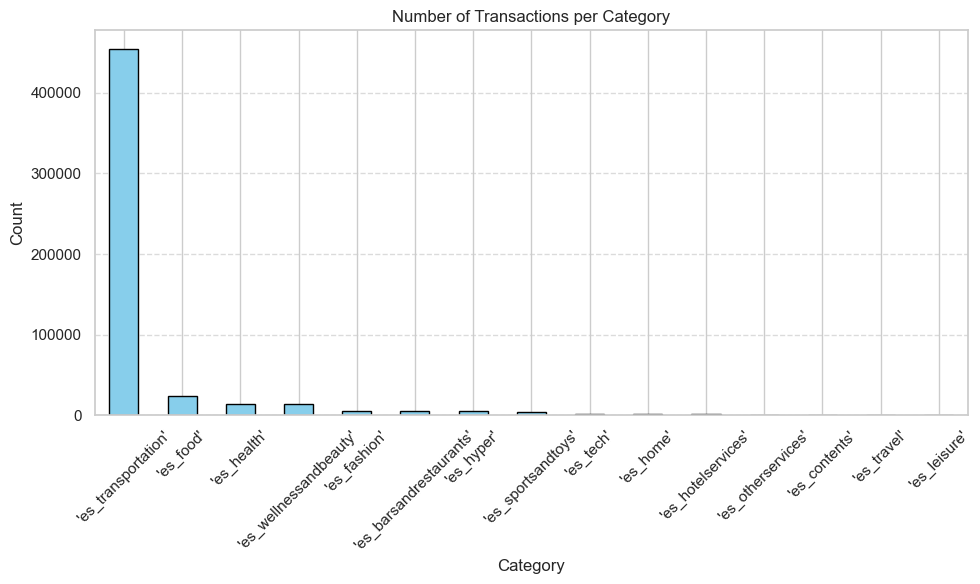

In [69]:
category_counts = df['category'].value_counts()

# Plot bar graph of category count
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Transactions per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

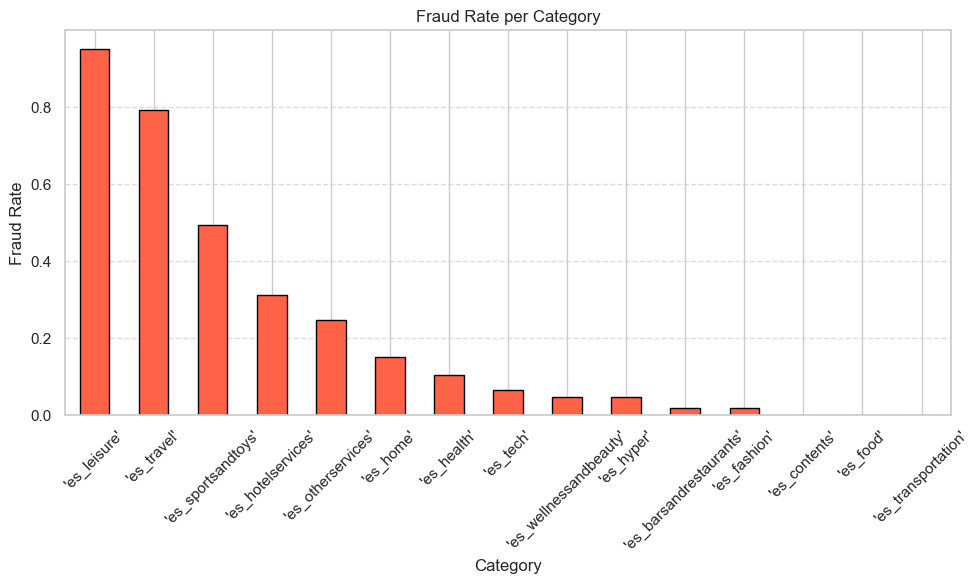

In [70]:
# Group by category and calculate fraud rate
fraud_rate = df.groupby('category')['fraud'].mean().sort_values(ascending=False)

# Plot fraud rate
plt.figure(figsize=(10, 6))
fraud_rate.plot(kind='bar', color='tomato', edgecolor='black')
plt.title('Fraud Rate per Category')
plt.xlabel('Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [71]:
df["amount"].describe().astype(int)

count    535178
mean         37
std         112
min           0
25%          13
50%          26
75%          42
max        8329
Name: amount, dtype: int64

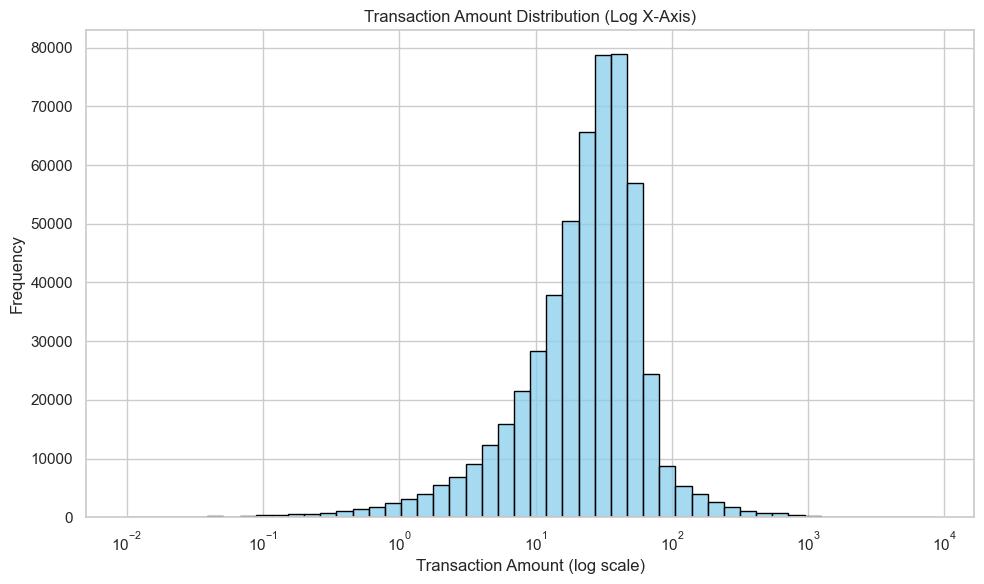

In [72]:
# Set Seaborn style
sns.set(style='whitegrid')

# Plot histogram with log-scaled x-axis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='amount', bins=50, log_scale=(True, False), color='skyblue', edgecolor='black')

plt.title('Transaction Amount Distribution (Log X-Axis)')
plt.xlabel('Transaction Amount (log scale)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

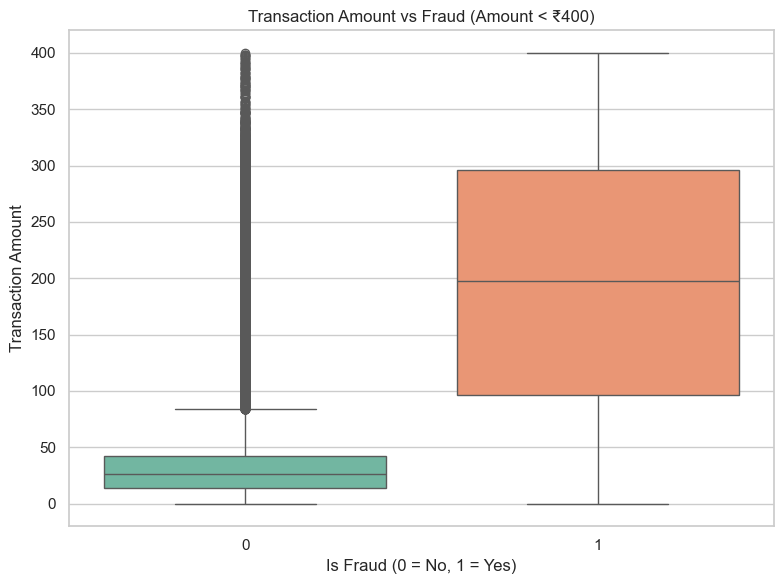

In [73]:
import warnings
warnings.filterwarnings('ignore')

# Filter transactions where amount < 2000
df_filtered = df[df['amount'] < 400]

# Plot boxplot of amount vs fraud
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, x='fraud', y='amount', palette='Set2')

plt.title('Transaction Amount vs Fraud (Amount < ₹400)')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

In [74]:
# Filter only fraudulent transactions
fraud_df = df[df['fraud'] == 1]

# Count frauds per customer
fraud_counts = fraud_df['customer'].value_counts()

# Get the top customer(s) with most frauds
most_fraudulent_customer = fraud_counts.idxmax()
fraud_count = fraud_counts.max()

print(f"Most fraudulent user: {most_fraudulent_customer} with {fraud_count} frauds")
print(fraud_counts.head(5))

Most fraudulent user: 'C1350963410' with 131 frauds
customer
'C1350963410'    131
'C806399525'     116
'C2004941826'    111
'C1849046345'    105
'C1275518867'    102
Name: count, dtype: int64


In [75]:
df

,customer,age,gender,merchant,category,amount,fraud
425126,'C182918114','5','F','M1535107174','es_wellnessandbeauty',128.26,0
168550,'C1413774656','2','F','M692898500','es_health',15.04,0
372208,'C2116616608','4','F','M348934600','es_transportation',34.73,0
36658,'C976209265','4','M','M348934600','es_transportation',34.66,0
471754,'C260840933','2','M','M348934600','es_transportation',25.59,0
...,...,...,...,...,...,...,...
330628,'C1978250683','3','F','M1053599405','es_health',35.55,0
535142,'C358037591','3','M','M1823072687','es_transportation',37.62,0
56,'C1313060996','3','F','M1823072687','es_transportation',29.06,0
49785,'C409331076','4','M','M1823072687','es_transportation',17.78,0


In [76]:
# Remove single quotes from all object (string) columns
df = df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)

# Replace 'U' in age with -1, then convert age to numeric
df['age'] = df['age'].replace('U', -1)
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Converts all to numeric, NaN if invalid

In [77]:
df

,customer,age,gender,merchant,category,amount,fraud
425126,C182918114,5,F,M1535107174,es_wellnessandbeauty,128.26,0
168550,C1413774656,2,F,M692898500,es_health,15.04,0
372208,C2116616608,4,F,M348934600,es_transportation,34.73,0
36658,C976209265,4,M,M348934600,es_transportation,34.66,0
471754,C260840933,2,M,M348934600,es_transportation,25.59,0
...,...,...,...,...,...,...,...
330628,C1978250683,3,F,M1053599405,es_health,35.55,0
535142,C358037591,3,M,M1823072687,es_transportation,37.62,0
56,C1313060996,3,F,M1823072687,es_transportation,29.06,0
49785,C409331076,4,M,M1823072687,es_transportation,17.78,0


In [78]:
# data types of cols
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535178 entries, 425126 to 49743
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   customer  535178 non-null  object 
 1   age       535178 non-null  int64  
 2   gender    535178 non-null  object 
 3   merchant  535178 non-null  object 
 4   category  535178 non-null  object 
 5   amount    535178 non-null  float64
 6   fraud     535178 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.7+ MB


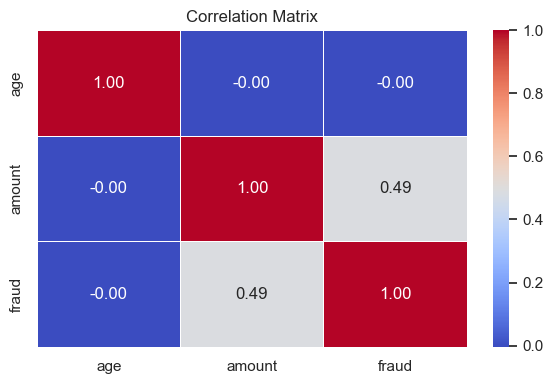

In [79]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
### NAIVE APPROACH 1

In [81]:
# One-hot encode gender
df = pd.get_dummies(df, columns=["gender"], drop_first=True)

In [82]:
df

,customer,age,merchant,category,amount,fraud,gender_F,gender_M,gender_U
425126,C182918114,5,M1535107174,es_wellnessandbeauty,128.26,0,True,False,False
168550,C1413774656,2,M692898500,es_health,15.04,0,True,False,False
372208,C2116616608,4,M348934600,es_transportation,34.73,0,True,False,False
36658,C976209265,4,M348934600,es_transportation,34.66,0,False,True,False
471754,C260840933,2,M348934600,es_transportation,25.59,0,False,True,False
...,...,...,...,...,...,...,...,...,...
330628,C1978250683,3,M1053599405,es_health,35.55,0,True,False,False
535142,C358037591,3,M1823072687,es_transportation,37.62,0,False,True,False
56,C1313060996,3,M1823072687,es_transportation,29.06,0,True,False,False
49785,C409331076,4,M1823072687,es_transportation,17.78,0,False,True,False


In [83]:
df1 = df

# One-hot encode category
df = pd.get_dummies(df, columns=["category"], drop_first=True)

In [85]:
# One-hot encode merchant
df = pd.get_dummies(df, columns=["merchant"], drop_first=True)

# Frequency encoding for customer
df["customer_freq"] = df["customer"].map(df["customer"].value_counts())
df = df.drop(columns=["customer"])

In [86]:
df

,age,amount,fraud,gender_F,gender_M,gender_U,category_es_contents,category_es_fashion,category_es_food,category_es_health,...,merchant_M78078399,merchant_M840466850,merchant_M855959430,merchant_M857378720,merchant_M85975013,merchant_M923029380,merchant_M933210764,merchant_M97925176,merchant_M980657600,customer_freq
425126,5,128.26,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,123
168550,2,15.04,0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,150
372208,4,34.73,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,150
36658,4,34.66,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,163
471754,2,25.59,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330628,3,35.55,0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,240
535142,3,37.62,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,161
56,3,29.06,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,156
49785,4,17.78,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,153


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Split Features and Target
X = df.drop("fraud", axis=1)
y = df["fraud"]

# 3. Train-Test Split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [88]:
# 4. Oversample the minority class using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: fraud
0    422948
1      5194
Name: count, dtype: int64
After SMOTE: fraud
0    422948
1    422948
Name: count, dtype: int64


In [89]:
# 5. Train Random Forest with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105738
           1       0.84      0.80      0.82      1298

    accuracy                           1.00    107036
   macro avg       0.92      0.90      0.91    107036
weighted avg       1.00      1.00      1.00    107036

Confusion Matrix:


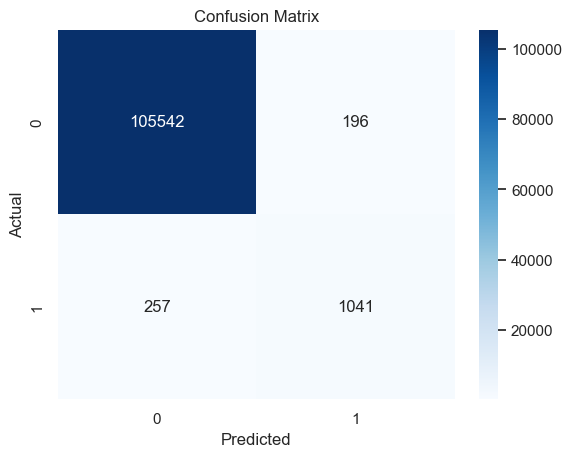

ROC-AUC Score: 0.9886008184721249


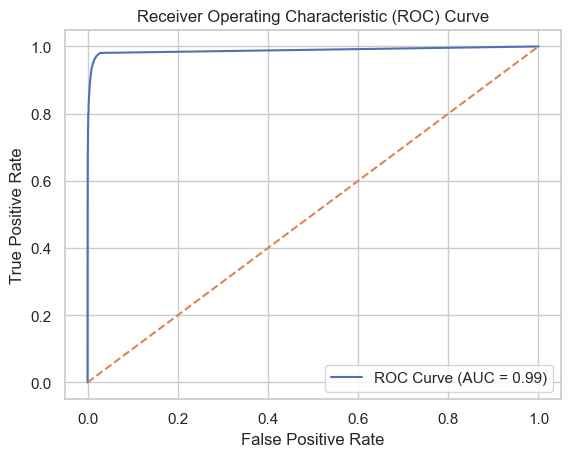

In [90]:
# 6. Predict on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 7. Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [92]:
df

,age,amount,fraud,gender_F,gender_M,gender_U,category_es_contents,category_es_fashion,category_es_food,category_es_health,...,merchant_M78078399,merchant_M840466850,merchant_M855959430,merchant_M857378720,merchant_M85975013,merchant_M923029380,merchant_M933210764,merchant_M97925176,merchant_M980657600,customer_freq
425126,5,128.26,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,123
168550,2,15.04,0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,150
372208,4,34.73,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,150
36658,4,34.66,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,163
471754,2,25.59,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330628,3,35.55,0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,240
535142,3,37.62,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,161
56,3,29.06,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,156
49785,4,17.78,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,153


# TRAINING CODE AND SAVING MODEL


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105738
           1       0.86      0.80      0.83      1298

    accuracy                           1.00    107036
   macro avg       0.93      0.90      0.91    107036
weighted avg       1.00      1.00      1.00    107036



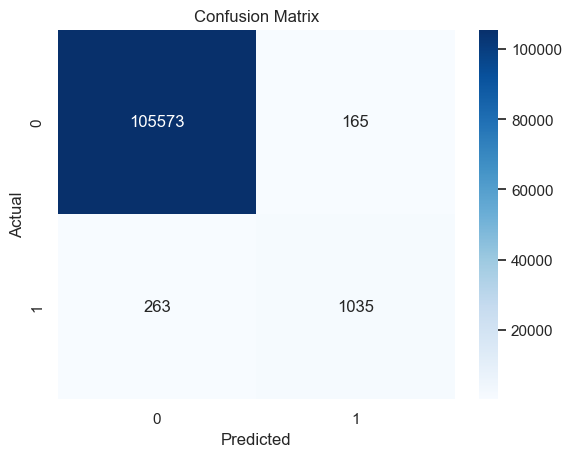

ROC-AUC Score: 0.9882648097467761


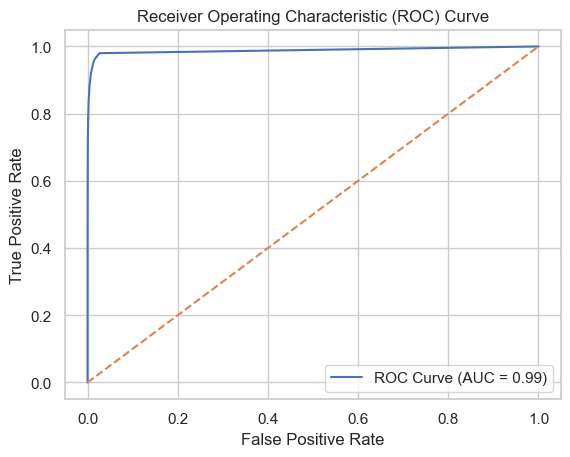

✅ Model saved as fraud_detection_model_RandomForest.pkl


In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ==========================
# Step 1: Load and Clean Data
# ==========================

df = pd.read_csv("dataset.csv")

# Drop irrelevant columns
df = df.drop(columns=["zipcodeOri", "zipMerchant", "step"])

# Remove single quotes from object columns
df = df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)

# Replace 'U' with -1 in age and convert to numeric
df['age'] = df['age'].replace('U', -1)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Save a copy before one-hot encoding
df1 = df.copy()

# Frequency encode 'customer'
df["customer_freq"] = df["customer"].map(df["customer"].value_counts())
df = df.drop(columns=["customer"])

# ==========================
# Step 2: Define Features
# ==========================

target_col = "fraud"
numeric_features = ['amount', 'age', 'customer_freq']
categorical_features = ['gender', 'category', 'merchant']

X = df.drop(target_col, axis=1)
y = df[target_col]

# ==========================
# Step 3: Split Data
# ==========================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ==========================
# Step 4: Define Preprocessor
# ==========================

# One-hot encode categorical features, drop first to avoid multicollinearity
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# No scaling here, RF does not require it; only impute missing numerics
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# ==========================
# Step 5: Define Model Pipeline with SMOTE
# ==========================

pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(class_weight='balanced', random_state=42))
])

# ==========================
# Step 6: Train the Model
# ==========================

pipeline.fit(X_train, y_train)

# ==========================
# Step 7: Evaluate on Test Set
# ==========================

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# ==========================
# Step 8: Save the Model
# ==========================

joblib.dump(pipeline, "fraud_detection_model_RandomForest.pkl")
print("✅ Model saved as fraud_detection_model_RandomForest.pkl")

# TESTING CODE

In [ ]:
# # TESTING MODEL CODE

# import pandas as pd
# import joblib

# # Load test data
# test_df = pd.read_csv("test.csv")       # ---> Replace test file here...

# # Apply same preprocessing: remove quotes, drop unused, encode age, etc.
# test_df = test_df.drop(columns=["zipcodeOri", "zipMerchant", "step"])
# test_df = test_df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)
# test_df['age'] = test_df['age'].replace('U', -1)
# test_df['age'] = pd.to_numeric(test_df['age'], errors='coerce')

# # Frequency encoding for 'customer'
# test_df["customer_freq"] = test_df["customer"].map(test_df["customer"].value_counts())
# test_df = test_df.drop(columns=["customer"])

# # Load the model
# model = joblib.load("fraud_detection_model_RandomForest.pkl")

# # Predict
# preds = model.predict(test_df)
# probs = model.predict_proba(test_df)[:, 1]

# # Save or show predictions
# test_df["predicted_fraud"] = preds
# test_df["fraud_probability"] = probs
# test_df.to_csv("test_predictions.csv", index=False)
# print("✅ Predictions saved to test_predictions.csv")

# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred))

In [96]:
## FEATURE IMPORTANCE


Top 20 Most Important Features:
                          Feature  Importance
0                          amount    0.234586
17     category_es_transportation    0.207564
15      category_es_sportsandtoys    0.074731
53            merchant_M480139044    0.067831
2                   customer_freq    0.051397
37           merchant_M1823072687    0.050780
9              category_es_health    0.046688
49            merchant_M348934600    0.035316
68            merchant_M980657600    0.034998
19  category_es_wellnessandbeauty    0.022312
4                        gender_M    0.018510
3                        gender_F    0.014516
11      category_es_hotelservices    0.012674
64             merchant_M85975013    0.011900
1                             age    0.010937
59            merchant_M732195782    0.008876
18             category_es_travel    0.008009
21           merchant_M1198415165    0.007964
13            category_es_leisure    0.007818
8                category_es_food    0.007093


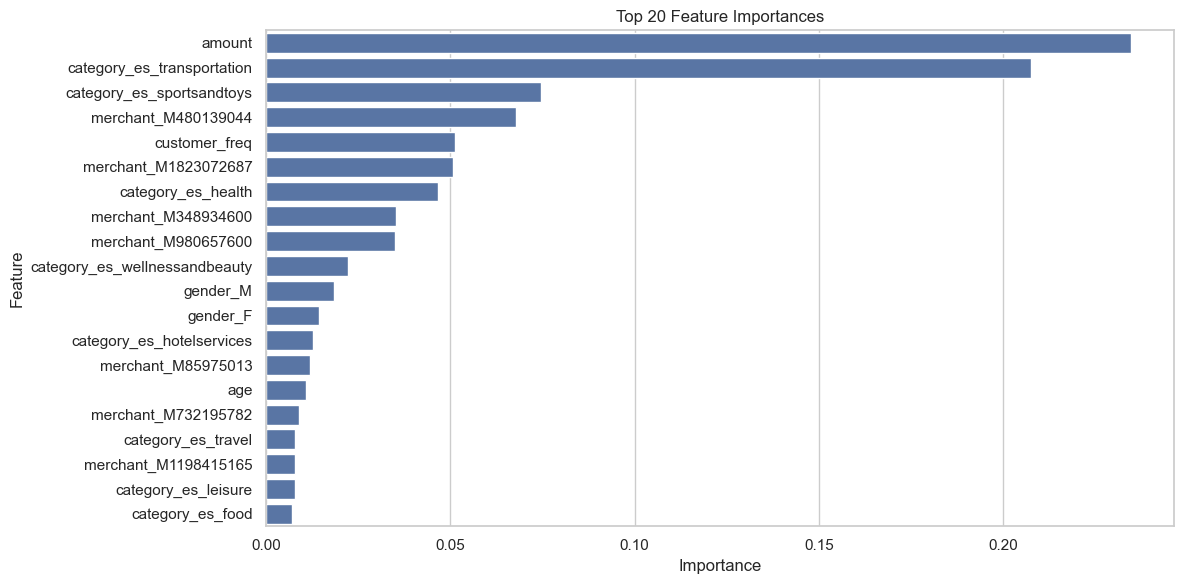

In [97]:
importances = pipeline.named_steps['classifier'].feature_importances_

# Get feature names from preprocessor
# 1. Numeric features
numeric_features_after = numeric_features  # same names

# 2. Categorical feature names after OneHotEncoding
categorical_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
categorical_feature_names = categorical_encoder.get_feature_names_out(categorical_features)

# Combine all final feature names
all_features = np.concatenate([numeric_features_after, categorical_feature_names])

# Create DataFrame for easy viewing
importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top N
print("\nTop 20 Most Important Features:")
print(importance_df.head(20))

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(20), x="Importance", y="Feature")
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

In [98]:
# Drop threshold (tune this as needed)
threshold = 0.005

# Features below this threshold are candidates for dropping
low_importance_features = importance_df[importance_df['Importance'] < threshold]

print(f"\nFeatures with importance < {threshold} (suggested to drop):")
print(low_importance_features)

print(f"\nTotal features to drop: {len(low_importance_features)}")


Features with importance < 0.005 (suggested to drop):
                      Feature  Importance
28        merchant_M151143676    0.003905
51          merchant_M3697346    0.003679
7         category_es_fashion    0.003400
42       merchant_M1913465890    0.003215
43       merchant_M1946091778    0.003213
10           category_es_home    0.003207
40       merchant_M1873032707    0.003027
29       merchant_M1535107174    0.002497
46        merchant_M209847108    0.002405
41       merchant_M1888755466    0.002400
14  category_es_otherservices    0.002235
34       merchant_M1741626453    0.002163
47       merchant_M2122776122    0.001927
16           category_es_tech    0.001880
31       merchant_M1649169323    0.001580
56        merchant_M547558035    0.001396
44       merchant_M2011752106    0.001278
50        merchant_M349281107    0.001005
58        merchant_M692898500    0.000926
55         merchant_M50039827    0.000876
30       merchant_M1600850729    0.000871
33         merchant_M

In [116]:
df = pd.read_csv("dataset.csv")

# Remove single quotes from all object (string) columns
df = df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)

# Replace 'U' in age with -1, then convert age to numeric
df['age'] = df['age'].replace('U', -1)
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Converts all to numeric, NaN if invalid

# Encode 'gender' as binary
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

# Encode 'customer' and 'merchant' with frequency encoding
df['customer_freq'] = df['customer'].map(df['customer'].value_counts())
df['merchant_freq'] = df['merchant'].map(df['merchant'].value_counts())

# One-hot encode category
df = pd.get_dummies(df, columns=['category'], drop_first=True)

# Select features and target
X = df.drop(columns=['step', 'zipcodeOri', 'zipMerchant', 'fraud', 'customer', 'merchant'])
y = df['fraud']


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105738
           1       0.89      0.78      0.83      1298

    accuracy                           1.00    107036
   macro avg       0.95      0.89      0.92    107036
weighted avg       1.00      1.00      1.00    107036

Confusion Matrix:


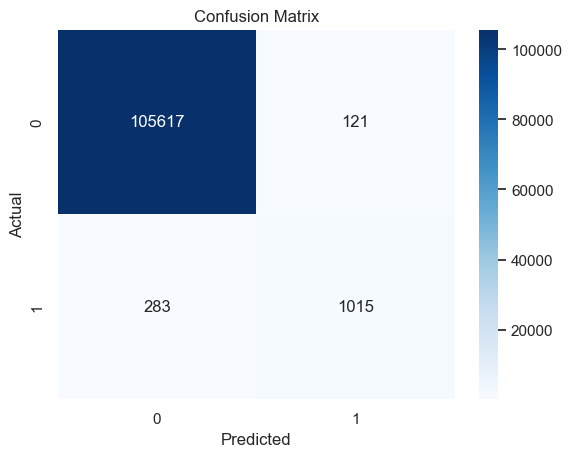

ROC-AUC Score: 0.9874702913539151


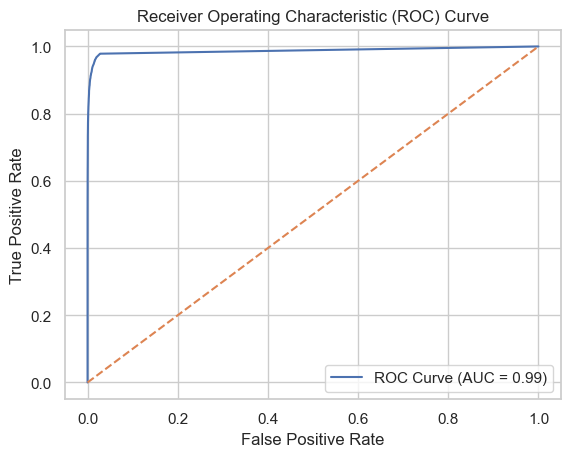

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 6. Predict on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 7. Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

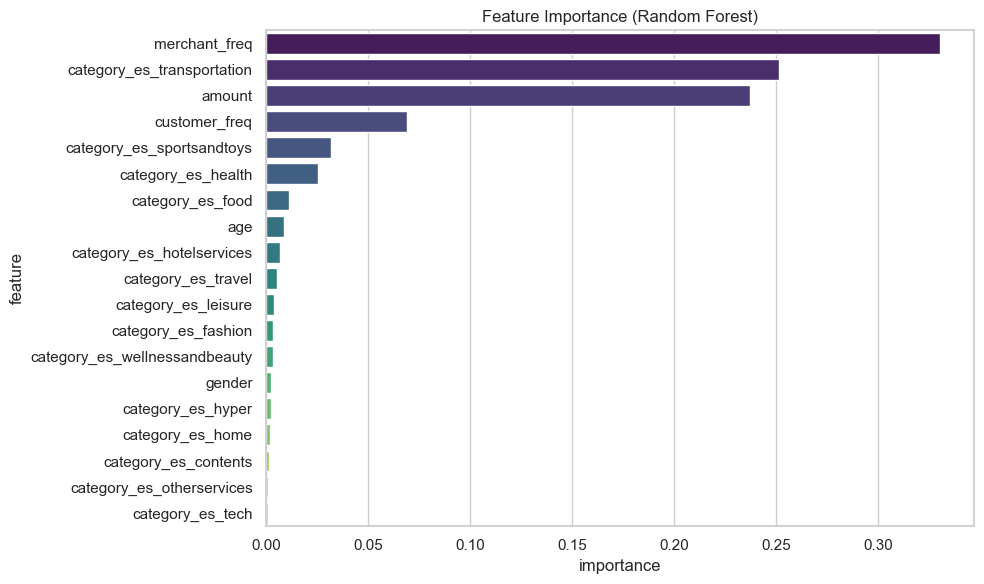

In [119]:
# Feature importance from the trained model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort and plot
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()